# 브랜드평판지수 엑셀파일 불러와서 전처리

### 필요 모듈 불러오기

In [1]:
import numpy as np
import pandas as pd

### 엑셀 파일 불러오기

In [2]:
df=pd.read_excel("브랜드평판지수(메가.이디야.빽).xlsx", engine ="openpyxl")
df

Unnamed: 0  2020.1월  2020.12월      1월      2월      3월      4월      5월  \
0       메가커피   423431    794091  528079  539306  643106  800617  803913   
1        이디야   537628   1245030  604014  501090  432778  535184  665242   
2        빽다방   212610    510427  262701  266424  279788  372072  440277   

       6월       7월       8월       9월      10월  
0  864645  1062764  1147202  1061101  1230470  
1  720242   637348  1015071   711182   639669  
2  476096   483178   603275   544360   568819

In [3]:
# 불필요한 column 제거
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
# 인덱스 이름 새로 지정
df.rename(index={0:'메가커피',1:'이디야',2:'빽다방'},inplace=True)

In [6]:
df

2020.1월  2020.12월      1월      2월      3월      4월      5월      6월  \
메가커피   423431    794091  528079  539306  643106  800617  803913  864645   
이디야    537628   1245030  604014  501090  432778  535184  665242  720242   
빽다방    212610    510427  262701  266424  279788  372072  440277  476096   

           7월       8월       9월      10월  
메가커피  1062764  1147202  1061101  1230470  
이디야    637348  1015071   711182   639669  
빽다방    483178   603275   544360   568819

In [7]:
# 데이터 재구조화( stack() : 행방향으로 재구조화)
df1=df.stack()

In [8]:
# df1의 열의 리셋
df2=pd.DataFrame(df1).reset_index()
df2.head()

level_0   level_1       0
0    메가커피   2020.1월  423431
1    메가커피  2020.12월  794091
2    메가커피        1월  528079
3    메가커피        2월  539306
4    메가커피        3월  643106

In [9]:
# column명 재지정
df2.columns=['상호명','날짜','브랜드 평판 지수']
df2.head()

상호명        날짜  브랜드 평판 지수
0  메가커피   2020.1월     423431
1  메가커피  2020.12월     794091
2  메가커피        1월     528079
3  메가커피        2월     539306
4  메가커피        3월     643106

# 브랜드 평판 지수 시각화

### 필요 모듈 불러오기

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from matplotlib import font_manager, rc  # 한글 폰트 지정
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

### 그래프로 시각화

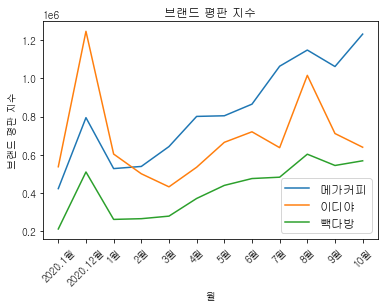

In [46]:
ax=sns.lineplot(x='날짜',y='브랜드 평판 지수', hue='상호명', data=df)

plt.title('브랜드 평판 지수')
plt.ylabel('브랜드 평판 지수')    
plt.xlabel('월')
plt.legend(fontsize=12, loc='best')
plt.xticks(rotation=45)

plt.show()

##### 브랜드 평판 지수 제공 사이트에서 제공하는 자료를 엑셀파일로 만들어서 선그래프로 시각화한 결과, 

2020년 12월에서 2021년 1월 한 달 사이에 메가커피, 이디야, 빽다방 모두 브랜드 평판 지수가 떨어졌다. 이디야는 1.2에서 0.6으로 크게 감소한데 비해 메가커피는 대략 0.8에서 0.6으로 작은 폭으로 감소했다.

2021년 1월까지는 이디야가 메가커피보다 상위에 있었는데, 이 시점을 기준으로
2월부터 메가커피가 이디야를 추월하고 점점 격차가 벌어지면서 가장 최근인 10월에는 메가커피의 브랜드 평판 지수가 이디야보다 2배 가량 높았다.
빽다방의 평판 지수도 점점 증가하면서 이디야와 격차가 점점 좁혀졌다. 

2021년 9월에서 10월 한 달 사이에는 빽다방, 메가커피의 브랜드 평판지수는 올라간 반면, 이디야는 오히려 감소한 것을 볼 수 있다.

##### 브랜드평판지수=참여지수+미디어지수+소통지수+커뮤니티지수+사회공헌지수
브랜드 평판지수는 브랜드 빅데이터를 추출하고 소비자 행동분석을 하여 참여가치, 소통가치, 미디어가치, 커뮤니티가치, 소셜가치로 분류하고 가중치를 두어 나온 지표이다. 브랜드 평판분석을 통해 브랜드에 대해 누가, 어디서, 어떻게, 얼마나, 왜 이야기하는지를 알아낼 수 있다.

한국기업평판연구소는 30개 커피전문점 브랜드에 대한 지난 한 달간 소비자들의 브랜드 빅데이터 평판을 분석하였다.